In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv('cancer.csv')

In [3]:
pd.set_option('display.max_columns',None)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

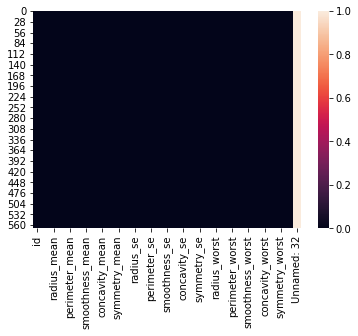

In [5]:
sns.heatmap(cancer.isnull())

In [6]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
cancer.drop(['Unnamed: 32', 'id'],axis=1,inplace=True)

In [8]:
num_feat = [i for i in cancer.columns if cancer[i].dtype != 'O']

cancer.info()

<AxesSubplot:>

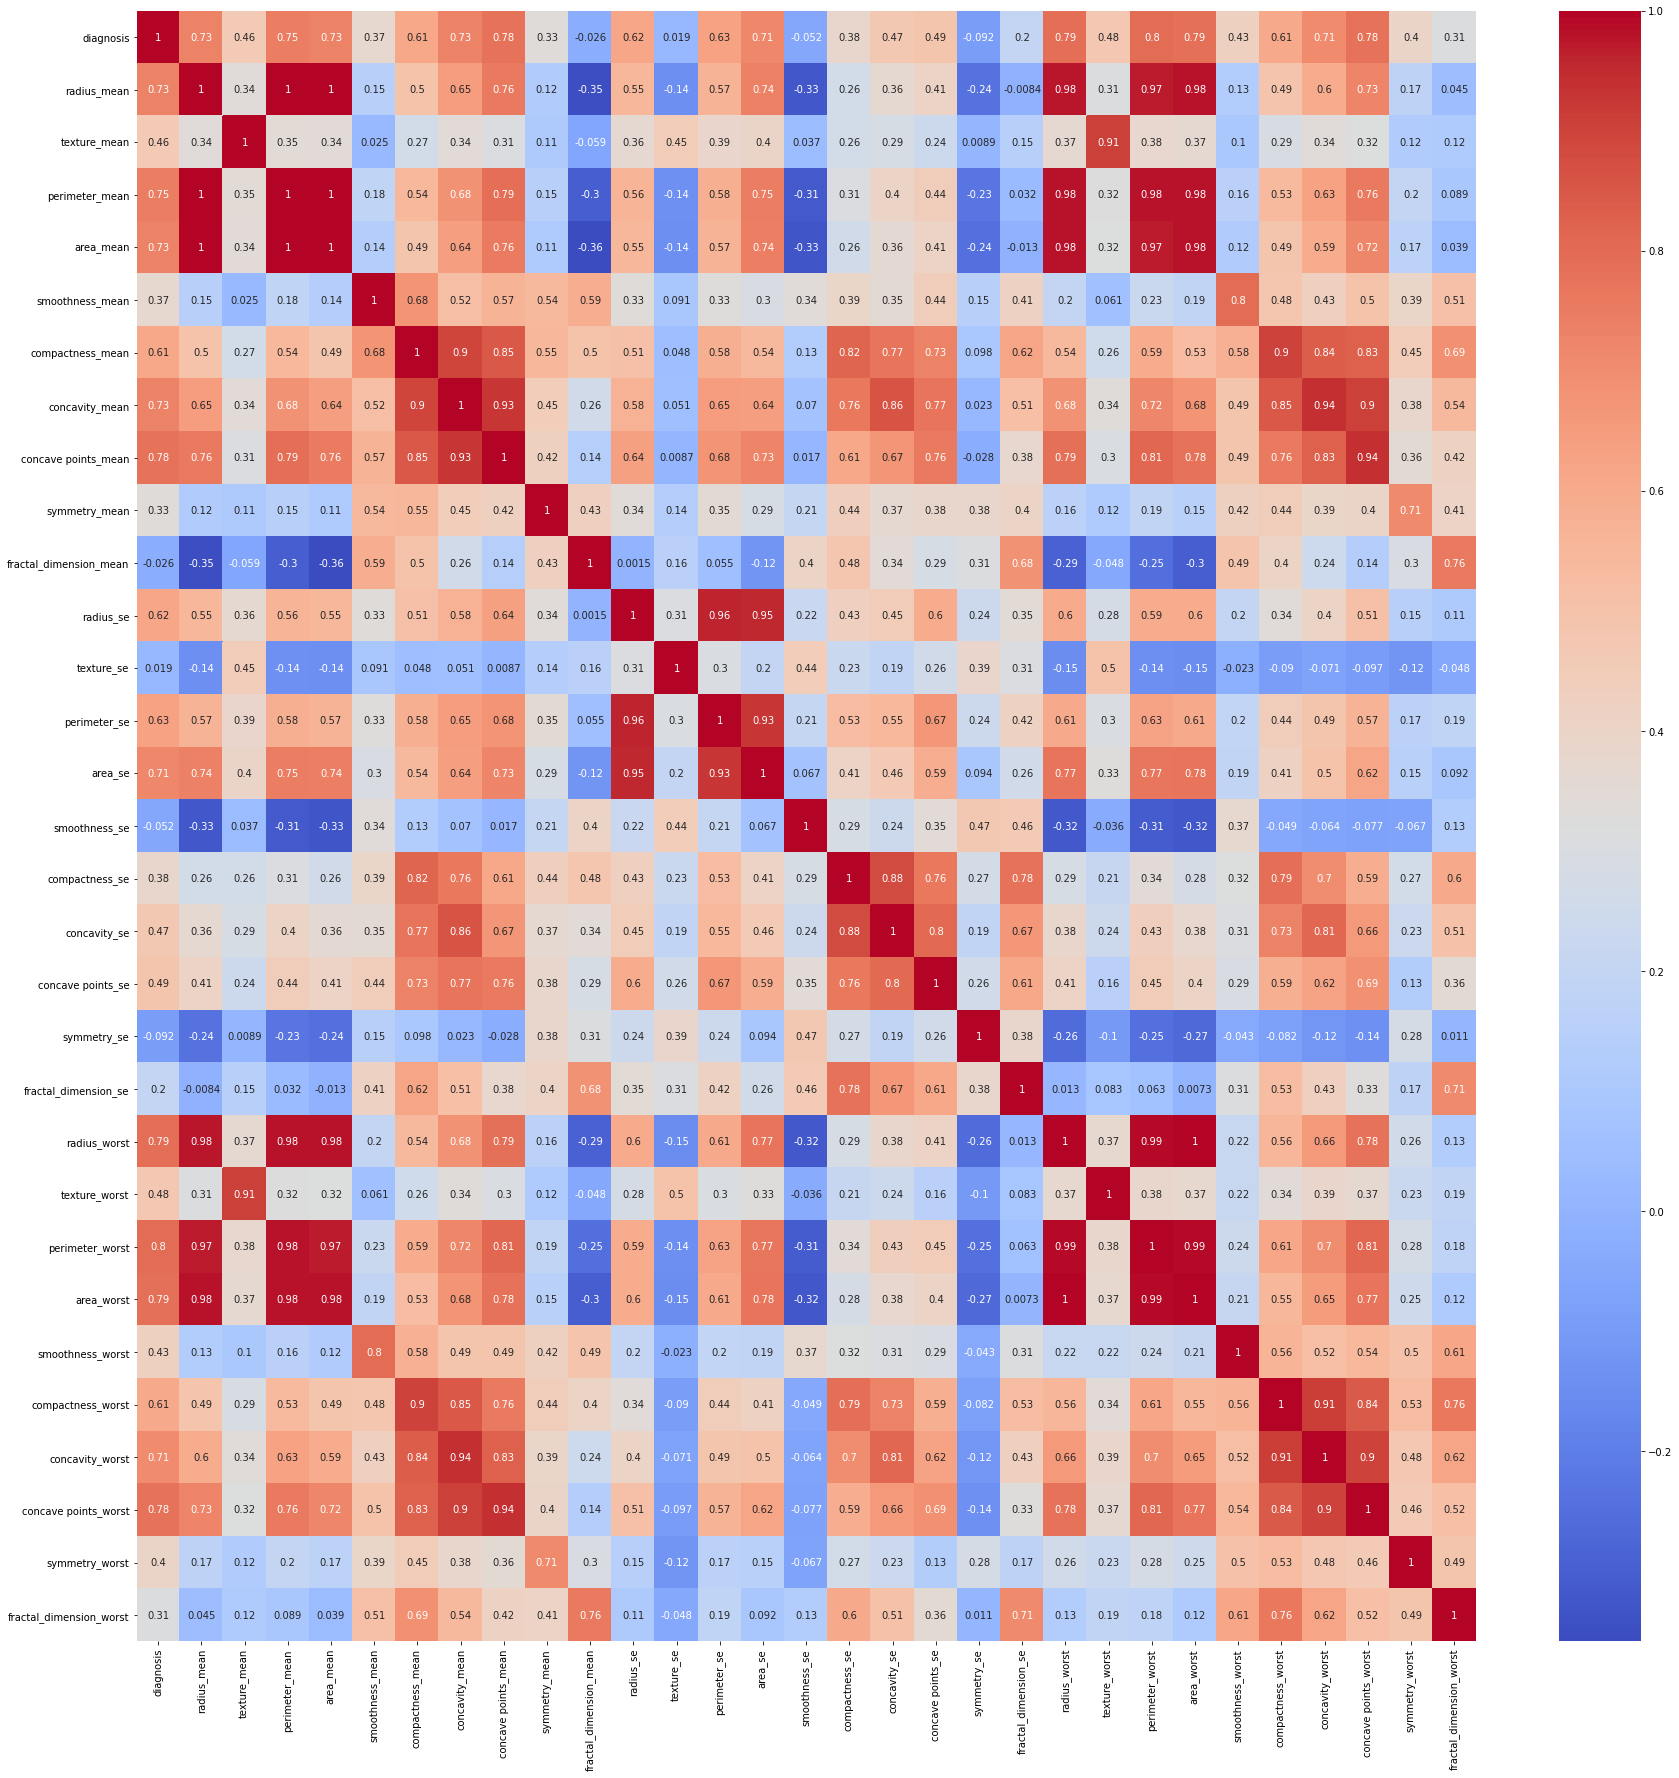

In [39]:
plt.figure(figsize=(30,30))
sns.heatmap(cancer.corr(method='spearman'), cmap='coolwarm',annot=True)

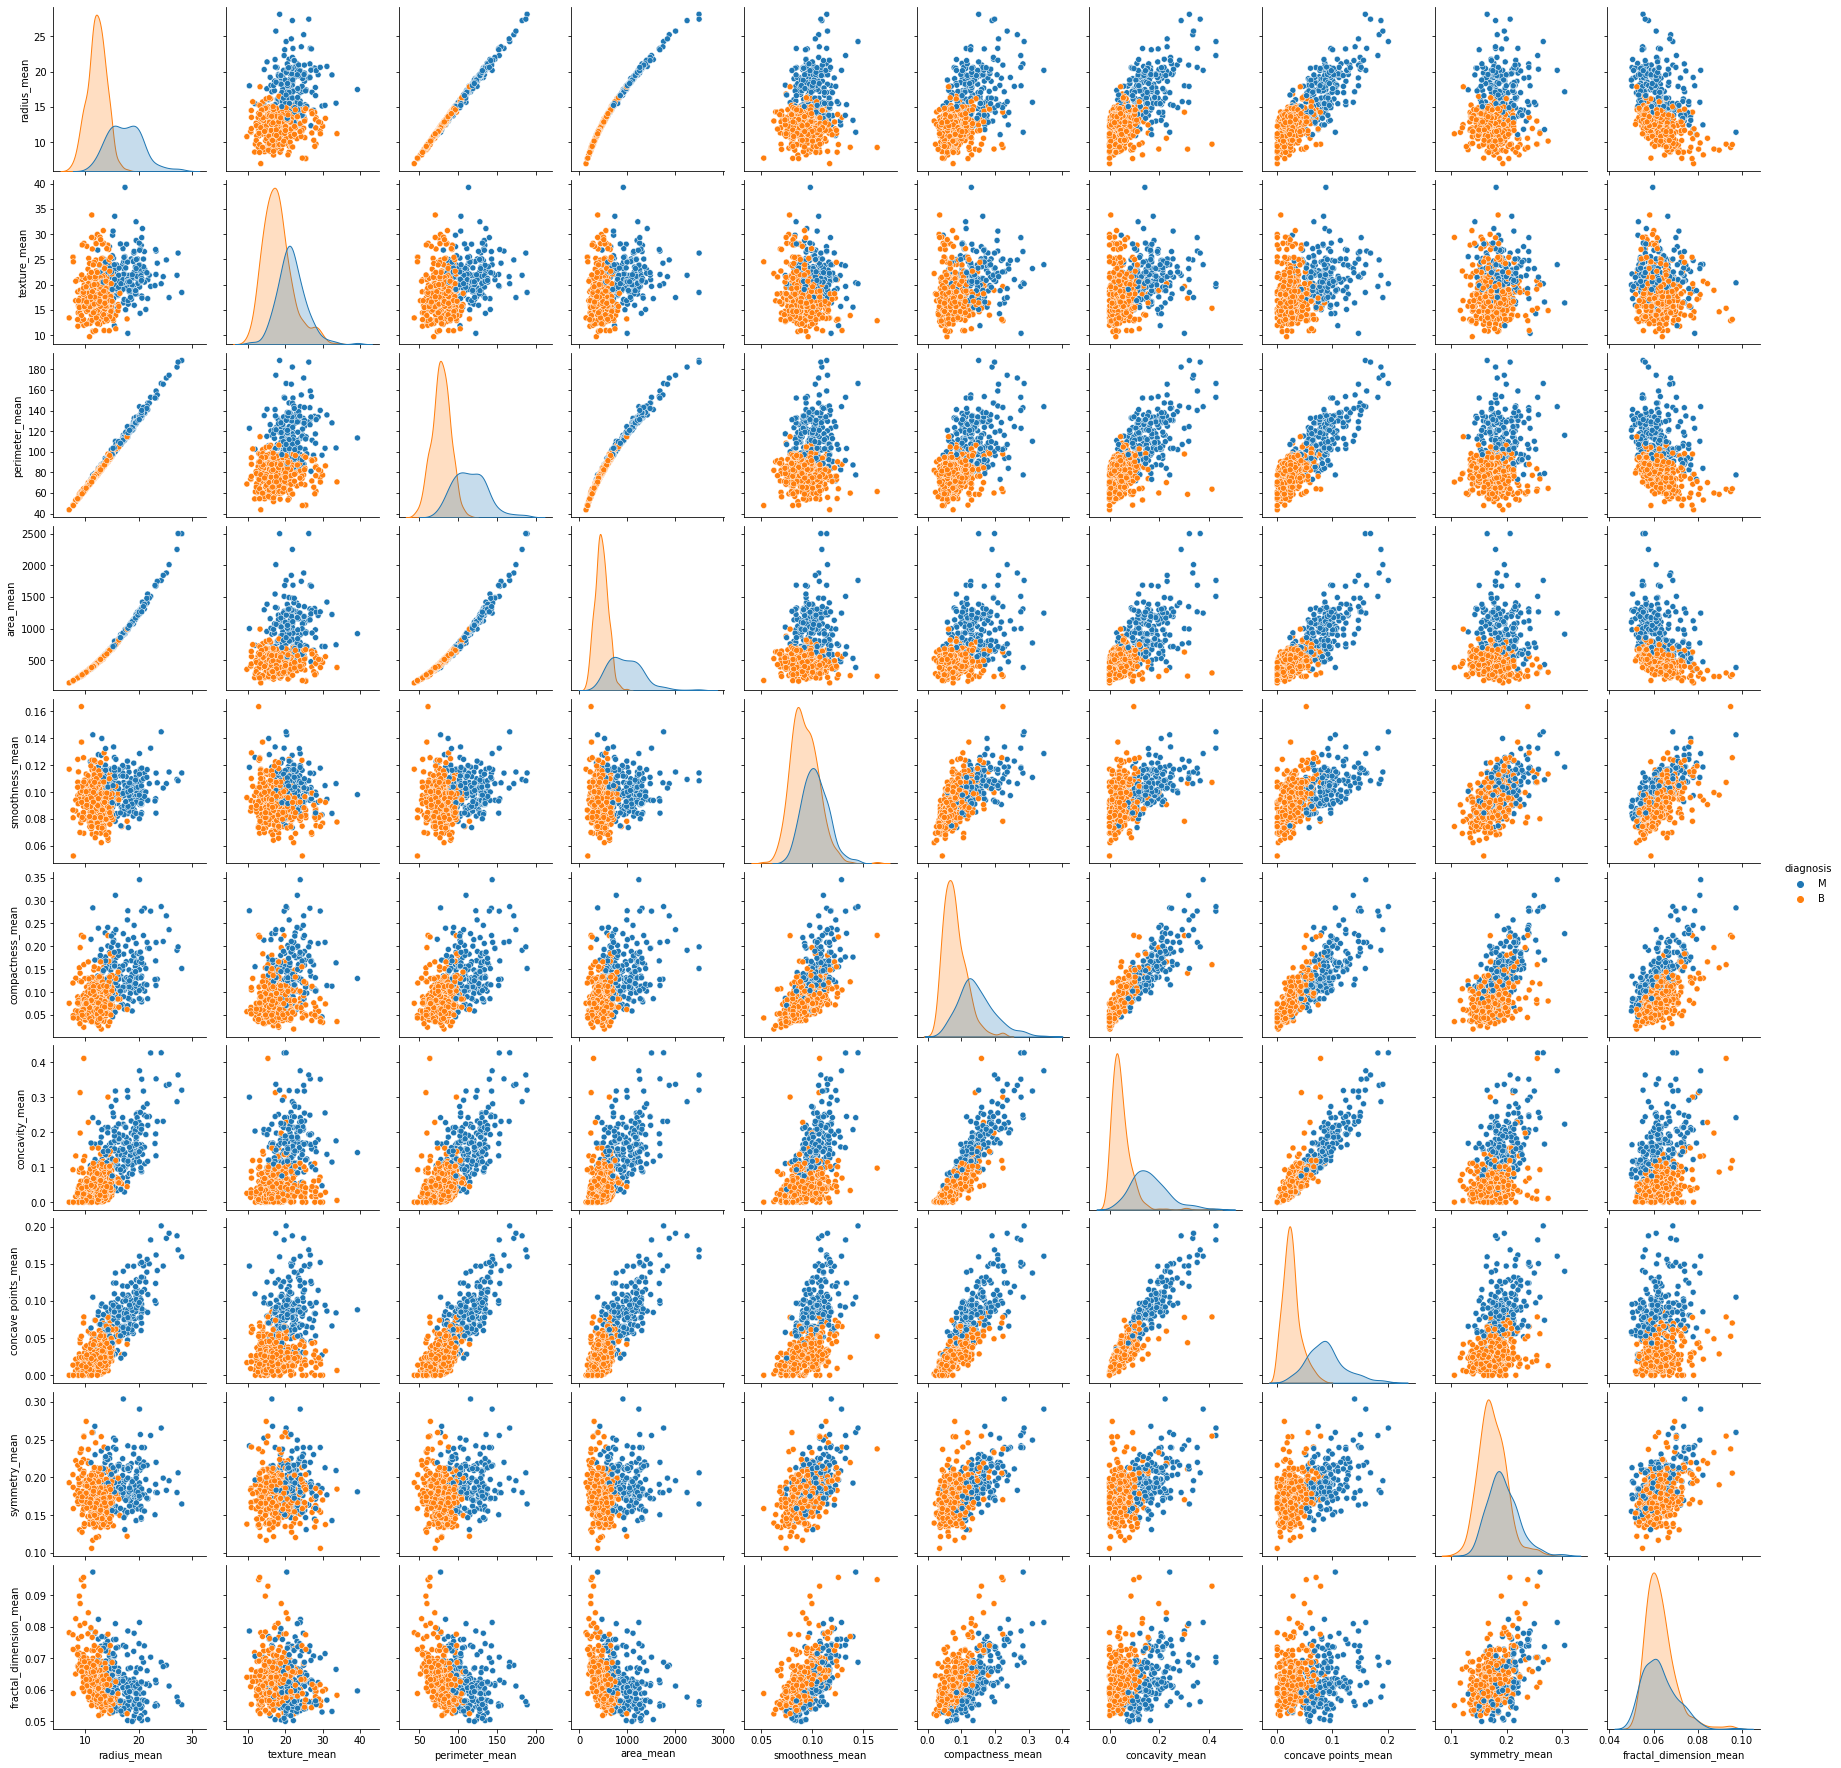

In [10]:
sns.pairplot(cancer.iloc[:, 0:11], hue='diagnosis')

In [11]:
cancer.shape

(569, 31)

C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


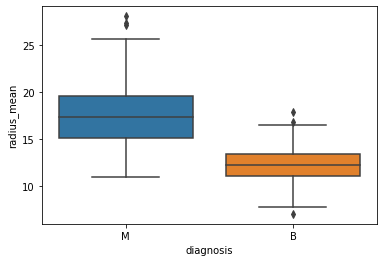

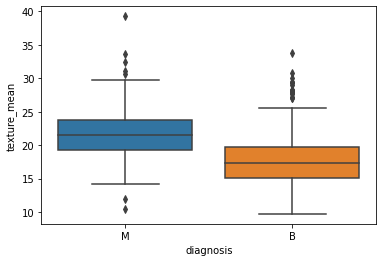

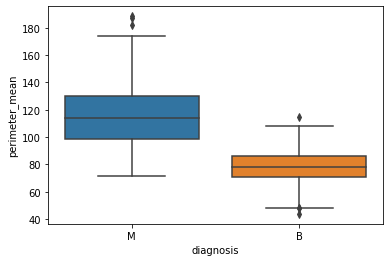

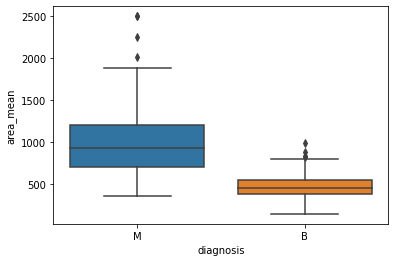

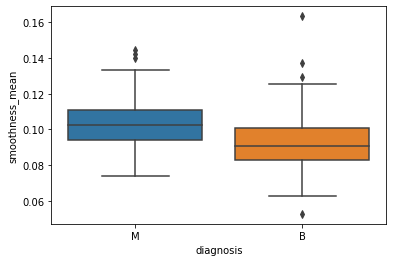

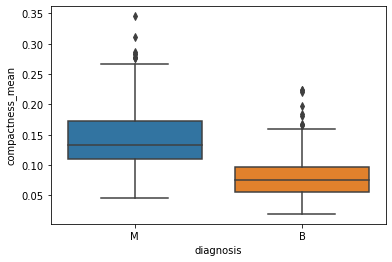

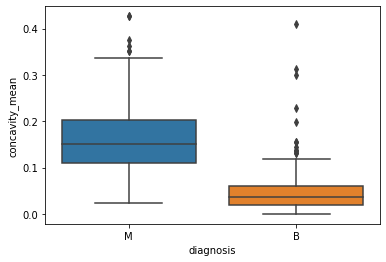

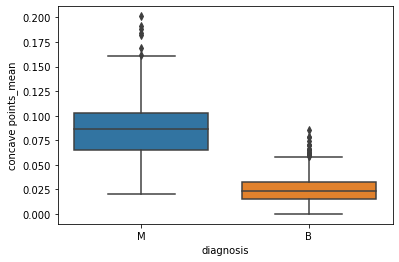

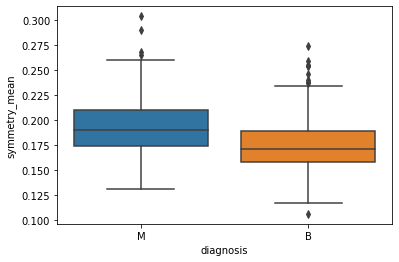

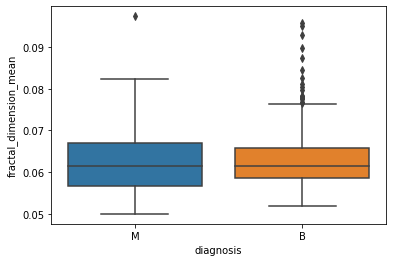

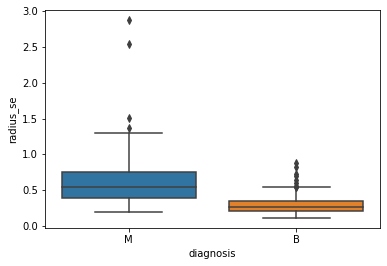

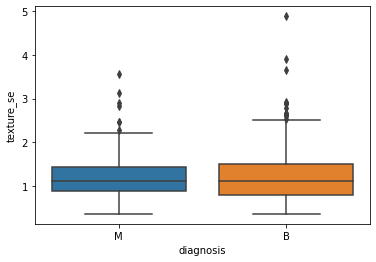

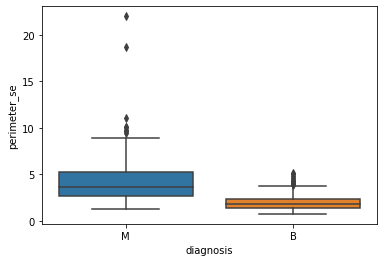

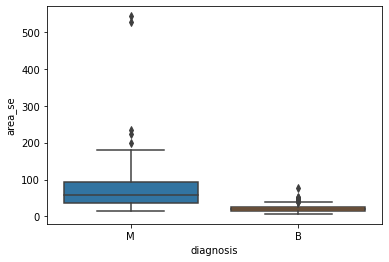

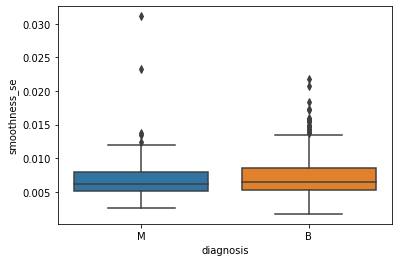

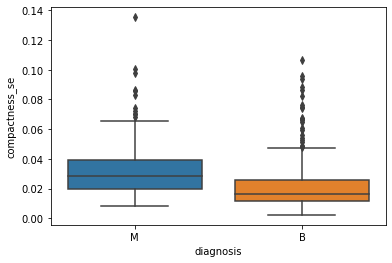

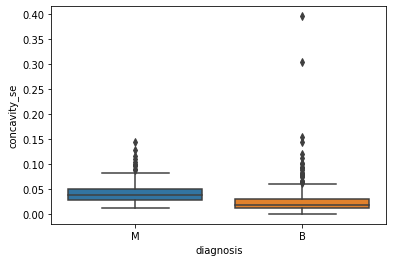

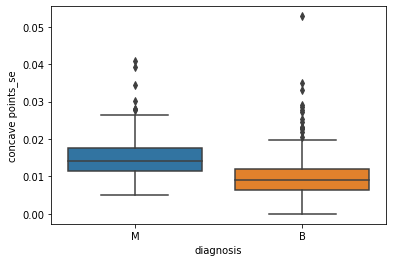

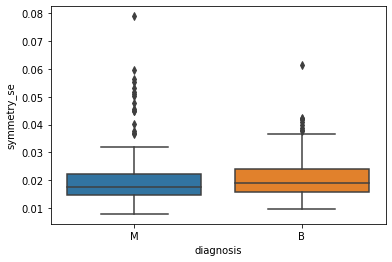

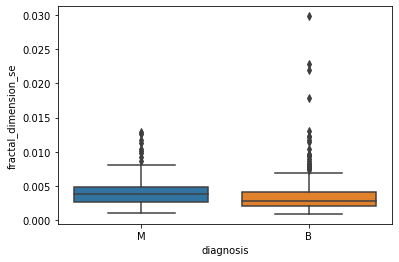

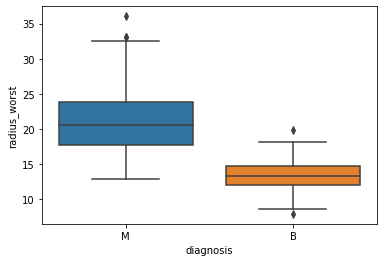

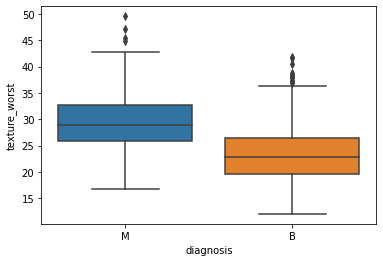

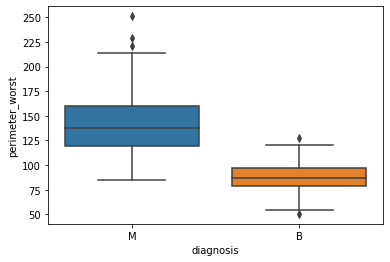

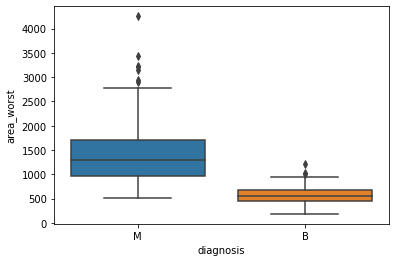

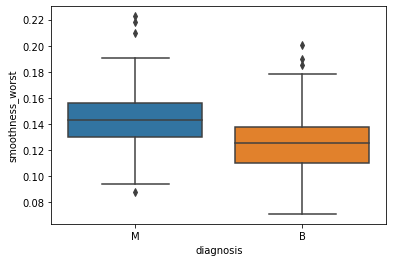

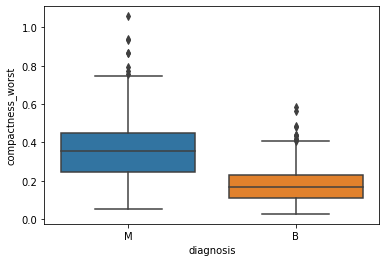

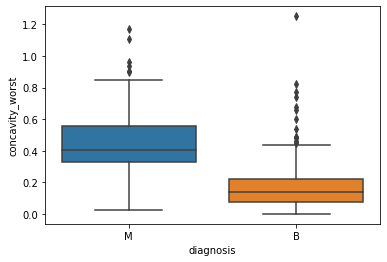

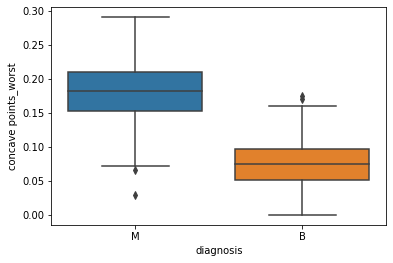

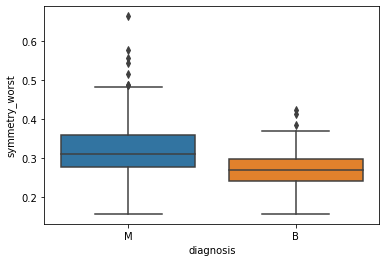

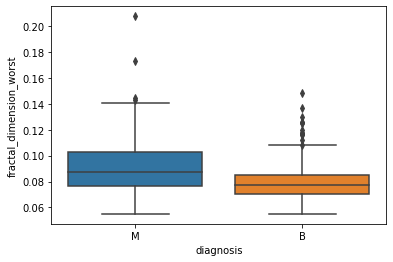

In [12]:
for i in num_feat:
    plt.subplots()
    sns.boxplot(data=cancer,x='diagnosis',y=i)

<AxesSubplot:>

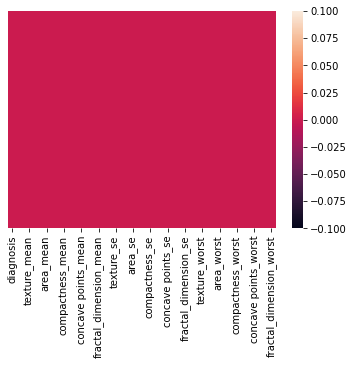

In [13]:
sns.heatmap(cancer.isnull(),yticklabels=False)

In [14]:
from sklearn.svm import SVC

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [16]:
X = num_feat
y = 'diagnosis'

In [17]:
cancer['diagnosis'] = pd.get_dummies(cancer['diagnosis'],drop_first=True)

In [18]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer[X],cancer[y], test_size=0.25,stratify=cancer[y], random_state=42)

In [33]:
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report

In [34]:
precision = 0
accuracy = 0
for kernel in ['poly', 'rbf', 'sigmoid']:
    if kernel == 'poly':
        for C in range(1,1000,50):
            for degree in [1,2,3,4,5]:
                model_temp = SVC(C=C,degree=degree,kernel=kernel)
                model_temp.fit(X_train,y_train)
                pred = model_temp.predict(X_test)
                if precision==1:
                    if precision_score(y_test,pred)!=1:
                        print('trying next model in poly kernel')
                        continue
                    else:
                        if accuracy_score(y_test,pred)>accuracy:
                            accuracy = accuracy_score(y_test,pred)
                            model = model_temp
                            print('accuracy',accuracy_score(y_test,pred),'precison',precision_score(y_test,pred))
                            print('kernel',kernel,'C',C,'degree',degree)
                        else:
                            print('trying next model in poly kernel')
                if precision_score(y_test,pred)>precision:
                    precision = precision_score(y_test,pred)
                    model = model_temp
                    print('accuracy',accuracy_score(y_test,pred),'precison',precision_score(y_test,pred))
                    print('kernel',kernel,'C',C,'degree',degree)
                else:
                    print('trying next model in poly kernel')
    else:            
        for gamma in np.arange(0.1,1,0.1):
            for C in range(1,1000,100):
                model_temp = SVC(C=C,gamma=gamma,kernel=kernel)
                model_temp.fit(X_train,y_train)
                pred = model_temp.predict(X_test)
                if precision==1:
                    if precision_score(y_test,pred)!=1:
                        print('trying next model in',kernel,'kernel')
                        continue
                    else:
                        if accuracy_score(y_test,pred)>accuracy:
                            accuracy = accuracy_score(y_test,pred)
                            model = model_temp
                            print('accuracy',accuracy_score(y_test,pred),'precison',precision_score(y_test,pred))
                            print('kernel',kernel,'C',C,'degree',degree)
                        else:
                            print('trying next model in',kernel,'kernel')
                if precision_score(y_test,pred)>precision:
                    precision = precision_score(y_test,pred)
                    model = model_temp
                    print('accuracy',accuracy_score(y_test,pred),'precison',precision_score(y_test,pred))
                    print('kernel',kernel,'gamma',gamma,'C',C)
                else:
                    print('trying next model in',kernel,'kernel')

accuracy 0.8951048951048951 precison 1.0
kernel poly C 1 degree 1
accuracy 0.8951048951048951 precison 1.0
kernel poly C 1 degree 2
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
accuracy 0.9090909090909091 precison 1.0
kernel poly C 51 degree 3
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
accuracy 0.916083916083916 precison 1.0
kernel poly C 101 degree 2
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying next model in poly kernel
trying n

C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel
trying next model in rbf kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel


C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shash\Anaconda3\envs\breast_cancer\lib\site-packages

trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel
trying next model in sigmoid kernel


In [35]:
model

SVC(C=201, kernel='poly')

In [36]:
print(precision)
print(accuracy)
print(confusion_matrix(y_test,model.predict(X_test)))

1.0
0.9300699300699301
[[90  0]
 [10 43]]


In [37]:
print(precision_score(y_train,model.predict(X_train)))
print(accuracy_score(y_train,model.predict(X_train)))
print(confusion_matrix(y_train,model.predict(X_train)))

0.9714285714285714
0.9366197183098591
[[263   4]
 [ 23 136]]
